In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification

%matplotlib inline

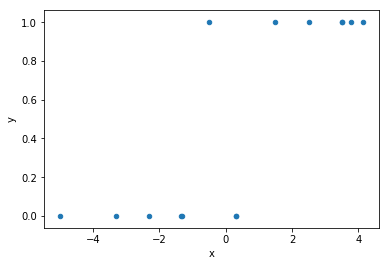

In [5]:
data = [
    (1,2.5),
    (0,-5),
    (1, 3.5),
    (1, 3.5),
    (1, -0.5),
    (0, 0.3),
    (0, -1.34),
    (1, 3.77),
    (1, 4.15),
    (1, 1.5),
    (0, 0.3),
    (0, -3.3),
    (0, -2.3),
    (0, -1.3)
]

df = pd.DataFrame(data, columns = ["y", "x"])
df.plot(kind="scatter", x = "x", y="y")


In [6]:
# Doing this as a linear regression first

from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

model = reg.fit(df[['x']], df['y'])
y_hat = model.predict(df[['x']])
y_hat

array([ 0.80251924, -0.28456221,  0.94746343,  0.94746343,  0.36768666,
        0.48364201,  0.24593354,  0.98659836,  1.04167716,  0.65757504,
        0.48364201, -0.03815708,  0.10678711,  0.2517313 ])

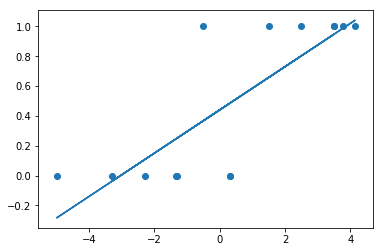

In [15]:
plt.plot(df['x'], y_hat)
plt.scatter(df['x'], df['y'])

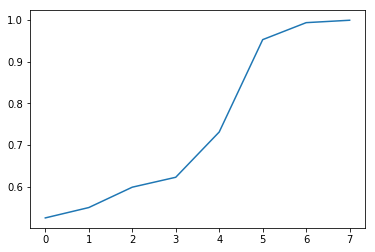

In [25]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

x_10 = np.linspace(-10, 10, 100)
x_100 = np.linspace(-10, 10, 100)
x_small = np.array([.1, .2, .4, .5, 1, 3, 5, 7])

plt.plot(sigmoid(x_small))

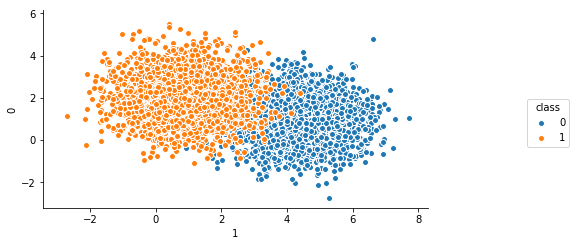

In [31]:
# Generate some data and plot.  

import seaborn as sns

X, y = make_blobs(n_samples=6000, centers=2, n_features=2, random_state=0)

df = pd.DataFrame(X)
df['class'] = y

g = sns.pairplot(df, x_vars =1, y_vars = 0, hue = 'class') # set it to a variable so that we can mess with the format
g.fig.set_size_inches(10, 4)  # very cool

In [50]:
# Write a class to do logistic regression

class BasicLogisticRegression:
    
    gradient_steps = 120000
    learning_rate = 0.00002
    coefficients = False
    
    def _init_(self, gradient_steps = False, learning_rate = False):
        
        if gradient_steps:
            self.gradient_steps = gradient_steps
            
        if learning_rate:
            self.learning_rate = learning_rate
    
    def sigmoid(self, y_hat):
        return 1/(1 + np.exp(-y_hat))
    
    def optimize_weights(self, X, y, coefficients):
        
        for step in range(self.gradient_steps):
            
            y_hat = np.dot(X, coefficients) #coefficient * variable, etc.
            y_hat = self.sigmoid(y_hat)
            
            error = y - y_hat
            
            gradient = np.dot(X.T, error)
            coefficients += self.learning_rate * gradient
            
            if step % 4999 == 0:
                print(coefficients)
                
        print("Optimization complete")
        return coefficients
    
        
    def fit(self, X, y):
        
        matrix_length = X.shape[0]
        intercept = np.ones(shape = (matrix_length, 1)) # Create an intercept of 1's
        
        X = np.concatenate((intercept, X), axis =1) # Add it to the data frame
        
        matrix_width = X.shape[1]
        coefficients = np.zeros(shape = matrix_width)
        self.coefficients = self.optimize_weights(X, y, coefficients)
        
        
        
reg = BasicLogisticRegression()
reg.fit(X, y)
        

[ 0.          0.03315942 -0.1029524 ]
[ 5.84548103  1.17376829 -2.98824668]
[ 6.80274091  1.14369831 -3.32164094]
[ 7.16371239  1.13778819 -3.45111534]
[ 7.31973557  1.13600747 -3.50761482]
[ 7.39058651  1.13534339 -3.53337182]
[ 7.42344     1.13506526 -3.54533599]
[ 7.43881802  1.13494147 -3.5509406 ]
[ 7.44604745  1.13488468 -3.55357639]
[ 7.44945301  1.13485824 -3.55481824]
[ 7.45105879  1.13484584 -3.55540384]
[ 7.45181628  1.13484001 -3.5556801 ]
[ 7.45217368  1.13483726 -3.55581044]
[ 7.45234233  1.13483596 -3.55587195]
[ 7.45242192  1.13483535 -3.55590098]
[ 7.45245948  1.13483506 -3.55591468]
[ 7.4524772   1.13483493 -3.55592114]
[ 7.45248556  1.13483486 -3.55592419]
[ 7.45248951  1.13483483 -3.55592563]
[ 7.45249137  1.13483482 -3.55592631]
[ 7.45249225  1.13483481 -3.55592663]
[ 7.45249267  1.13483481 -3.55592678]
[ 7.45249286  1.13483481 -3.55592685]
[ 7.45249296  1.13483481 -3.55592689]
[ 7.452493    1.13483481 -3.5559269 ]
Optimization complete


In [51]:
reg.coefficients

array([ 7.452493  ,  1.13483481, -3.5559269 ])

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model = logreg.fit(X, y)
np.exp(model.coef_)

array([[ 3.10817898,  0.03838895]])

In [63]:
from sklearn.datasets import load_iris

data = load_iris()

iris = pd.DataFrame(data['data'], columns = data['feature_names'])
iris

logreg = LogisticRegression()
model = logreg.fit(iris, data['target'])

model.coef_, model.classes_

(array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
        [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
        [-1.70752515, -1.53426834,  2.47097168,  2.55538211]]),
 array([0, 1, 2]))

In [54]:
import statsmodels.api as sm


In [57]:
test = pd.DataFrame(X, columns = ['x1', 'x2'])
test['target'] = y

logit = sm.Logit(test['target'], test[['x1', 'x2']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.194787
         Iterations 8


In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5998
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:                  0.7190
Time:                        13:38:06   Log-Likelihood:                -1168.7
converged:                       True   LL-Null:                       -4158.9
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2565      0.067     33.707      0.000       2.125       2.388
x2            -1.6016      0.046    -34.905      0.000      -1.692      -1.512
==============================================================================
"""